# ePSproc LF/AF function verification & tests

- 10/09/20 v5 AF code now working and verified.
- 27/08/20 v4 Revisiting again, updates to normalisation with degen factor. Now getting correct $\beta$ values, still some possible issues with total XS however.
- 06/07/20 v3 Updated plotting codes & added AF tests.
- 26/06/20 v2
- 19/06/20 v1

For LF and AF calculations, trying to get to the bottom of issues with magnitudes and/or phases and/or formalism differences with raw ePS matrix elements.

## Formalism

Test cases: 

1. ePS matrix elements with formalism from [1], for LF cross-sections and $\beta_{2}$. Formalism with Clebsch-Gordan (CG) terms.
2. ePSproc AF calculations, for LF cross-sections and $\beta_{2}$ in isotropic case (or other terms in general cases). Usual 3j-symbol based formalism.

The AF calculations should reduce to the LF case for an isotropic ensemble, and both cases should match the "direct" ePS `GetCro` outputs (LF). Hopefully this should clear up any outstanding issues with normalisation, units, scale-factors, phase conventions etc. For details of the AF code, see [the method dev notes](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_pt3_AFBLM_090620.html).

(For MF verification, see [the MFPADs](https://epsproc.readthedocs.io/en/dev/demos/ePSproc_demo_Aug2019.html#Calculate-MFPADs) and [associated $\beta_{LM}$](https://epsproc.readthedocs.io/en/dev/demos/ePSproc_BLM_calc_demo_Sept2019.html#Benchmark-vs.-) notebooks, where the numerics are verified for the NO2 test case, although the total cross-sections may still have issues (for more discussion, see [the Matlab code release software paper](https://www.authorea.com/users/71114/articles/122402/_show_article)). The geometric tensor version of the [MF calculations is also verified against the same test case](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_pt2_170320_v140420.html#Verification---test-vs.-existing-calcs).)


[1] *Cross section and asymmetry parameter calculation for sulfur 1s photoionization of SF6*, A. P. P. Natalense and R. R. Lucchese, J. Chem. Phys. 111, 5344 (1999), http://dx.doi.org/10.1063/1.479794

[2] Reid, Katharine L., and Jonathan G. Underwood. “Extracting Molecular Axis Alignment from Photoelectron Angular Distributions.” The Journal of Chemical Physics 112, no. 8 (2000): 3643. https://doi.org/10.1063/1.480517.

[3] Underwood, Jonathan G., and Katharine L. Reid. “Time-Resolved Photoelectron Angular Distributions as a Probe of Intramolecular Dynamics: Connecting the Molecular Frame and the Laboratory Frame.” The Journal of Chemical Physics 113, no. 3 (2000): 1067. https://doi.org/10.1063/1.481918.

[4] Stolow, Albert, and Jonathan G. Underwood. “Time-Resolved Photoelectron Spectroscopy of Non-Adiabatic Dynamics in Polyatomic Molecules.” In Advances in Chemical Physics, edited by Stuart A. Rice, 139:497–584. Advances in Chemical Physics. Hoboken, NJ, USA: John Wiley & Sons, Inc., 2008. https://doi.org/10.1002/9780470259498.ch6.

### Formalism: LF case with CG terms

As given in ref. [1]. This is now implemented in  [implemented in `ePSproc.lfblmGeom`](https://epsproc.readthedocs.io/en/dev/modules/epsproc.geomFunc.lfblmGeom.html). NOTE - that the $M$ term here is an MF projection term, and should be summed over for the final LF result.

---

The matrix elements $I_{\mathbf{k},\hat{n}}^{(L,V)}$ of Eqs. (8)
and (9) can be expanded in terms of the $X_{lh}^{p\mu}$ functions
of Eq. (7) as$^{14}$

\begin{equation}
I_{\mathbf{k},\hat{n}}^{(L,V)}=\left[\frac{4\pi}{3}\right]^{1/2}\sum_{p\mu lhv}I_{lhv}^{p\mu(L,V)}X_{lh}^{p\mu}(\hat{k})X_{1v}^{p_{v}\mu_{v}}(\hat{n}).
\end{equation}

{[}Note here the final term gives polarization (dipole) terms, with
$l=1$, $h=v$, corresponding to a photon with one unit of angular
momentum and projections $v=-1,0,1$, correlated with irreducible
representations $p_{v}\mu_{v}$.{]}

The differential cross section is given by

\begin{equation}
\frac{d\sigma^{L,V}}{d\Omega_{\mathbf{k}}}=\frac{\sigma^{L,V}}{4\pi}[1+\beta_{\mathbf{k}}^{L,V}P_{2}(\cos\theta)],
\end{equation}

where the asymmetry parameter can be written as$^{14}$

\begin{eqnarray}
\beta_{\mathbf{k}}^{L,V} & = & \frac{3}{5}\frac{1}{\sum_{p\mu lhv}|I_{\mathbf{k},\hat{n}}^{(L,V)}|^{2}}\sum_{\stackrel{p\mu lhvmm_{v}}{p'\mu'l'h'v'm'm'_{v}}}(-1)^{m'-m_{v}}I_{\mathbf{k},\hat{n}}^{(L,V)}\nonumber \\
 & \times & \left(I_{\mathbf{k},\hat{n}}^{(L,V)}\right)^{*}b_{lhm}^{p\mu}b_{l'h'm'}^{p'\mu'*}b_{1vm_{v}}^{p_{v}\mu_{v}}b_{1v'm'_{v}}^{p'_{v}\mu'_{v}*}\nonumber \\
 & \times & [(2l+1)(2l'+1)]^{1/2}(1100|20)(l'l00|20)\nonumber \\
 & \times & (11-m'_{v}m_{v}|2M')(l'l-m'm|2-M'),
\end{eqnarray}

and the $(l'lm'm|L'M')$ are the usual Clebsch--Gordan coefficients.
The total cross section is

\begin{equation}
\sigma^{L,V}=\frac{4\pi^{2}}{3c}E\sum_{p\mu lhv}|I_{\mathbf{k},\hat{n}}^{(L,V)}|^{2},
\end{equation}

where c is the speed of light.

---

Additional notes:

- In the current numerics, the XS is defined as $\beta_0$ calculated as per above, for $L=0$, or as $1/3*\sum_{p\mu lhv}|I_{\mathbf{k},\hat{n}}^{(L,V)}|^{2}$. These are identical.
- The normalisation factors of 1/3 and 1/5 appear to be $1/(2L+1)$ (or other degeneracy - possibly symmetry) terms - TBC.
- Computing $\beta_0$ with the full formalism gives the correct values here, while using the matrix elements directly requires the additional 1/3 normalisation term.
- For $\beta_2$, the 1/5 term is required in both cases.

### AF formalism

The original (full) form for the AF equations, as [implemented in `ePSproc.afblm`](https://epsproc.readthedocs.io/en/dev/modules/epsproc.AFBLM.html) (NOTE - there are some corrections to be made here, which are not yet implemented in the base code, but are [now in the geometric version](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_pt3_AFBLM_090620.html)):

\begin{eqnarray}
\beta_{L,-M}^{\mu_{i},\mu_{f}} & = & \sum_{l,m,\mu}\sum_{l',m',\mu'}(-1)^{M}(-1)^{m}(-1)^{(\mu'-\mu_{0})}\left(\frac{(2l+1)(2l'+1)(2L+1)}{4\pi}\right)^{1/2}\left(\begin{array}{ccc}
l & l' & L\\
0 & 0 & 0
\end{array}\right)\left(\begin{array}{ccc}
l & l' & L\\
-m & m' & -M
\end{array}\right)\nonumber \\
 & \times & I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)I_{l',m',\mu'}^{p_{i}\mu_{i},p_{f}\mu_{f}*}(E)\\
 & \times & \sum_{P,R,R'}(2P+1)(-1)^{(R'-R)}\left(\begin{array}{ccc}
1 & 1 & P\\
\mu_{0} & -\mu_{0} & R
\end{array}\right)\left(\begin{array}{ccc}
1 & 1 & P\\
\mu & -\mu' & R'
\end{array}\right)\\
 & \times & \sum_{K,Q,S}(2K+1)^{1/2}(-1)^{K+Q}\left(\begin{array}{ccc}
P & K & L\\
R & -Q & -M
\end{array}\right)\left(\begin{array}{ccc}
P & K & L\\
R' & -S & S-R'
\end{array}\right)A_{Q,S}^{K}(t)
\end{eqnarray}

Where $I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)$ are the energy-dependent dipole matrix elements, and $A_{Q,S}^{K}(t)$ define the alignment parameters.

In terms of the geometric parameters, this can be rewritten as:

\begin{eqnarray}
\beta_{L,-M}^{\mu_{i},\mu_{f}} & =(-1)^{M} & \sum_{P,R',R}{[P]^{\frac{1}{2}}}{E_{P-R}(\hat{e};\mu_{0})}\sum_{l,m,\mu}\sum_{l',m',\mu'}(-1)^{(\mu'-\mu_{0})}{\Lambda_{R'}(\mu,P,R')B_{L,-M}(l,l',m,m')}I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)I_{l',m',\mu'}^{p_{i}\mu_{i},p_{f}\mu_{f}*}(E)\sum_{K,Q,S}\Delta_{L,M}(K,Q,S)A_{Q,S}^{K}(t)\label{eq:BLM-tidy-prod-2}
\end{eqnarray}

See the [method dev notebook](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_pt3_AFBLM_090620.html#) for more details. Both methods gave the same results for N2 test cases, so are at least consistent, but do not currently match ePS GetCro outputs for the LF case.

### Numerics

In both LF and AF cases, the numerics tested herein are based on the geometric tensor expansion code, which has been verified for the MF case as noted above (for PADs at a single energy).

A few additional notes on the implementations...

- The matrix elements used are taken from the DumpIdy output segments of the ePS output file, which provide "phase corrected and properly normalized dynamical coefs".
- The matrix elements output by ePS are assumed to correspond to $I_{lhv}^{p\mu(L,V)}$ as defined above.
- The Scale Factor (SF) "to sqrt Mbarn" output with the matrix elements is assumed to correspond to the $\frac{4\pi^{2}}{3c}E$ term defined above, plus any other required numerical factors ($4\pi$ terms and similar).
    - The SF is energy dependent, but not continuum (or partial wave) dependent.
    - If correct, then using matrix elements * scale factor, should give correct results (as a function of $E$), while omitting the scale factor should still give correct PADs at any given $E$, but incorrect total cross-section and energy scaling.
    - This may be incorrect, and some other assumptions are tested herein.
    - EDIT: now verified as $SF*\sqrt(4*pi)$ to match LF/GetCro cross-section results.
- The AF and LF case should match for an isotropic distribution, defined as $A^{0}_{0,0}=1$. Additional normalisation required here...?
    - A factor of $\sqrt{(2K+1)}/8\pi^2$ might be required for correct normalisation, although shouldn't matter in this case. (See eqn. 47 in [4].)
    - For the LF case, as defined above, conversion from Legendre-normalised $\beta$ to spherical harmonic normalised $\beta$ is required for comparison with the AF formalism, where $\beta^{Sph}_{L,0} = \sqrt{(2L+1)/4\pi}\beta^{Lg}$

### Status

09/09/20 - AF code now working correctly, and verified herein, ePSproc v1.2.5-dev.

## Set up

In [1]:
# Imports
import numpy as np
import pandas as pd
import xarray as xr

# Special functions
# from scipy.special import sph_harm
import spherical_functions as sf
import quaternion

# Performance & benchmarking libraries
# from joblib import Memory
# import xyzpy as xyz
import numba as nb

# Timings with ttictoc or time
# https://github.com/hector-sab/ttictoc
# from ttictoc import TicToc
import time

# Package fns.
# For module testing, include path to module here
import sys
import os

if sys.platform == "win32":
    modPath = r'D:\code\github\ePSproc'  # Win test machine
else:
    modPath = r'/home/femtolab/github/ePSproc/'  # Linux test machine
    
sys.path.append(modPath)
import epsproc as ep
# TODO: tidy this up!
from epsproc.util import matEleSelector
from epsproc.geomFunc import geomCalc, geomUtils
from epsproc.geomFunc.lfblmGeom import lfblmXprod

# Plotters
from epsproc.plot import hvPlotters

* pyevtk not found, VTK export not available. 


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
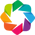

In [2]:
hvPlotters.setPlotters()
# import bokeh
# import holoviews as hv
# hv.extension('bokeh')

In [3]:
# With hvplot.
# This is nice for Bokeh back-end, but a bit of a pain for formatting the plot initially.
# Needs unstacked dims, plus array name.

from hvplot import hvPlot
import hvplot.xarray


## Test N2 case

### Load data

In [4]:
# Load data from modPath\data
dataPath = os.path.join(modPath, 'data', 'photoionization')
dataFile = os.path.join(dataPath, 'n2_3sg_0.1-50.1eV_A2.inp.out')  # Set for sample N2 data for testing

# Scan data file
dataSet = ep.readMatEle(fileIn = dataFile)
dataXS = ep.readMatEle(fileIn = dataFile, recordType = 'CrossSection')  # XS info currently not set in NO2 sample file.

*** ePSproc readMatEle(): scanning files for DumpIdy segments.

*** Scanning file(s)
['D:\\code\\github\\ePSproc\\data\\photoionization\\n2_3sg_0.1-50.1eV_A2.inp.out']

*** Reading ePS output file:  D:\code\github\ePSproc\data\photoionization\n2_3sg_0.1-50.1eV_A2.inp.out
Expecting 51 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 102 DumpIdy segments.
Found 102 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 102 sets of DumpIdy file segments, (0 blank)
*** ePSproc readMatEle(): scanning files for CrossSection segments.

*** Scanning file(s)
['D:\\code\\github\\ePSproc\\data\\photoionization\\n2_3sg_0.1-50.1eV_A2.inp.out']

*** Reading ePS output file:  D:\code\github\ePSproc\data\photoionization\n2_3sg_0.1-50.1eV_A2.inp.out
Expecting 51 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 3 CrossSection segments.
Found 3 CrossSection segments (sets of results).
Processed 3 sets of Cro

### Reference results from GetCro

These are the LF cross-sections and $\beta$ parameters output directly from ePolyScat, use these as reference results.

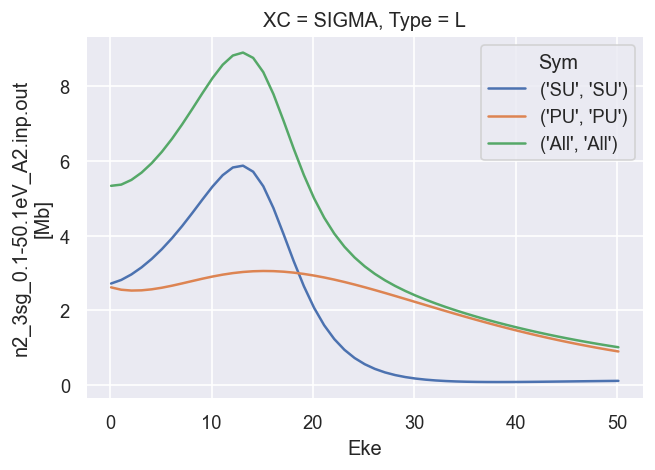

In [5]:
# Plot cross sections using Xarray functionality
dataXS[0].sel({'Type':'L', 'XC':'SIGMA'}).plot.line(x='Eke');

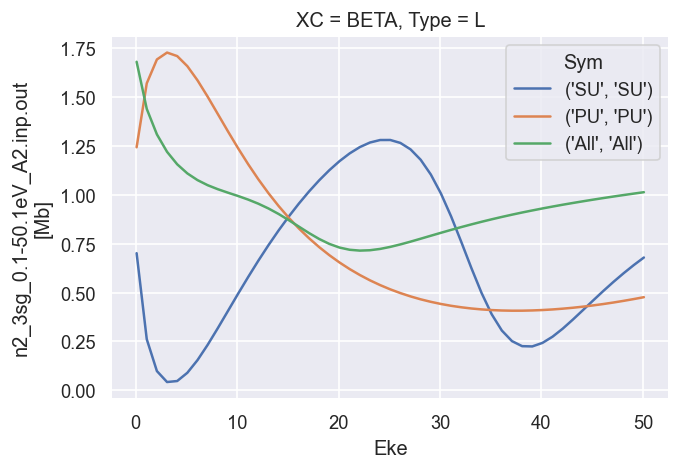

In [6]:
# Plot B2
dataXS[0].sel({'Type':'L', 'XC':'BETA'}).plot.line(x='Eke');

### Test LF calculations (CG version)

#### Without sym summation

In [7]:
dataSet[0].coords

Coordinates:
    Ehv      (Eke) float64 15.68 16.68 17.68 18.68 ... 62.68 63.68 64.68 65.68
  * Type     (Type) object 'L' 'V'
  * Eke      (Eke) float64 0.1 1.1 2.1 3.1 4.1 5.1 ... 46.1 47.1 48.1 49.1 50.1
  * it       (it) int64 1
  * mu       (mu) int64 -1 0 1
  * LM       (LM) MultiIndex
  - l        (LM) int64 1 1 1 3 3 3 5 5 5 7 7 7 9 9 9 11 11 11
  - m        (LM) int64 -1 0 1 -1 0 1 -1 0 1 -1 0 1 -1 0 1 -1 0 1
  * Sym      (Sym) MultiIndex
  - Cont     (Sym) object 'SU' 'PU'
  - Targ     (Sym) object 'SG' 'SG'
  - Total    (Sym) object 'SU' 'PU'
    SF       (Eke) complex128 (2.1560627+3.741674j) ... (4.4127053+1.8281945j)

In [8]:
# Set parameters
SFflag = False  # Multiply matrix elements by SF?
symSum = False  # Sum over symmetries?
phaseConvention = 'S'
thres = 1e-4
selDims = {'it':1, 'Type':'L'}
thresDims = 'Eke'

# Set terms for testing - NOTE ORDERING HERE may affect CG term!!!
dlistMatE = ['lp', 'l', 'L', 'mp', 'm', 'M']  # Match published terms
dlistP = ['p1', 'p2', 'L', 'mup', 'mu', 'M']
# dlistMatE = ['l', 'lp', 'L', 'm', 'mp', 'M']  # Standard terms
# dlistP = ['p1', 'p2', 'L', 'mu', 'mup', 'M']


# Set matrix elements
matE = dataSet[0].copy()

# Calculate betas - dev code has various output types for testing
BetaNormXS, BetaNorm, BetaRaw, XSmatE, BetaNormX = lfblmXprod(matE, symSum = symSum, SFflag = SFflag, 
                              thres = thres, thresDims = thresDims, selDims = selDims, 
                              phaseConvention = phaseConvention,
                              dlistMatE = dlistMatE, dlistP = dlistP)

# Here BetaNormXS includes the correct normalisation term as per the original formalism, and XSmatE is the sum of the squared matrix elements, as used for the normalisation (== cross section without correct scaling).
# BetaNorm is calculated only from the BLM CG formalism.

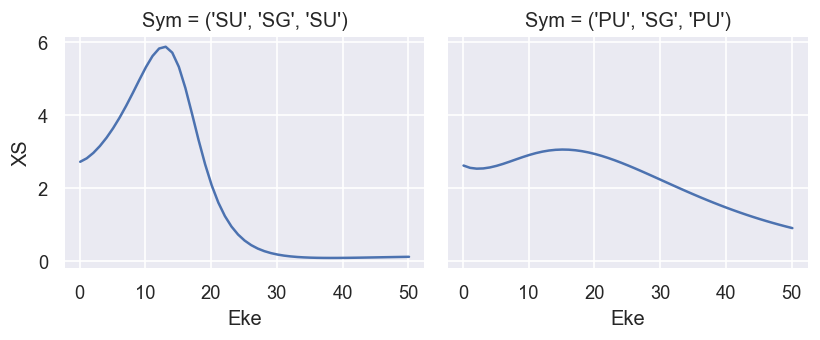

In [9]:
# Plot results - full XS
plotThres = None
ep.util.matEleSelector(BetaNorm['XS'], thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke', col='Sym');

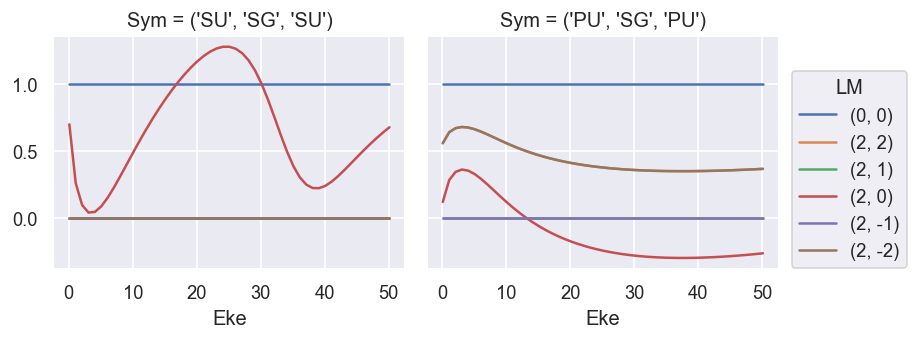

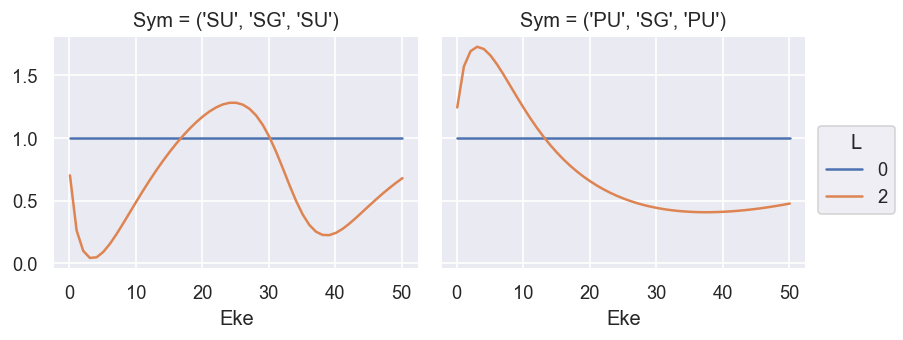

In [10]:
# Plot results - normalised (B0, B2).
# NOTE - M term here is additional degen factor, as noted above.
# Summing over M gives the final LF terms, as defined above.
# The B0 term (==cross section) is not correctly scaled here.
# The B2 term matches the GetCro reference results.

ep.util.matEleSelector(BetaNorm, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke', col='Sym');  # Full set of terms
ep.util.matEleSelector(BetaNorm.unstack('LM').sum('M'), thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke', col='Sym');  # Summed over 'M'

**Compare with GetCro reference values**

In [11]:
# Compare XS values
# Comparison plot using hvplot - needs some work!

xPlot1 = ep.util.matEleSelector(BetaNorm['XS'], thres = plotThres, dims='Eke', sq=True, drop=True).unstack().squeeze() #
xPlot1.name='XS calc'
plot1 = xPlot1.real.unstack().squeeze().hvplot.line(x='Eke', by = 'Total', width=1200, height= 800);  # For hvplot need to unstack & squeeze to avoid dim issues and related errors.
# ep.util.matEleSelector(BetaNormXS_sph, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke', linestyle='dashed');

# Ugly sub-select on syms to ensure consistency over data - should be a neater way to do this!
syms = ['SU','PU']
xPlot2 = dataXS[0].sel({'Type':'L', 'XC':'SIGMA'}).unstack().sel({'Total':syms, 'Cont':syms}).squeeze();
# xPlot2 = ep.util.matEleSelector(BetaNormXS_sph, thres = plotThres, dims='Eke', sq=True, drop=True)
xPlot2.name='XS GetCro'
plot2 = xPlot2.real.unstack().squeeze().hvplot.line(x='Eke', by='Total', line_dash='dashed');

(plot1 * plot2)

:DynamicMap   [Cont]
   :Overlay
      .NdOverlay.I  :NdOverlay   [Total]
         :Curve   [Eke]   (XS calc)
      .NdOverlay.II :NdOverlay   [Total]
         :Curve   [Eke]   (XS GetCro)

*** OK - the cross-sections from the full CG-calculation and ePS `GetCro` match for each continuum.

In [12]:
# Compare B2 values
# Comparison plot using hvplot - needs some work!

xPlot1 = ep.util.matEleSelector(BetaNorm.unstack('LM').sum('M'), thres = plotThres, dims='Eke', sq=True, drop=True).sel(L=2).unstack().squeeze() #
xPlot1.name='XS calc'
plot1 = xPlot1.real.unstack().squeeze().hvplot.line(x='Eke', by = 'Total', width=1200, height= 800);  # For hvplot need to unstack & squeeze to avoid dim issues and related errors.
# ep.util.matEleSelector(BetaNormXS_sph, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke', linestyle='dashed');

# Ugly sub-select on syms to ensure consistency over data - should be a neater way to do this!
syms = ['SU','PU']
xPlot2 = dataXS[0].sel({'Type':'L', 'XC':'BETA'}).unstack().sel({'Total':syms, 'Cont':syms}).squeeze();
# xPlot2 = ep.util.matEleSelector(BetaNormXS_sph, thres = plotThres, dims='Eke', sq=True, drop=True)
xPlot2.name='XS GetCro'
plot2 = xPlot2.real.unstack().squeeze().hvplot.line(x='Eke', by='Total', line_dash='dashed');

(plot1 * plot2)

:DynamicMap   [Cont]
   :Overlay
      .NdOverlay.I  :NdOverlay   [Total]
         :Curve   [Eke]   (XS calc)
      .NdOverlay.II :NdOverlay   [Total]
         :Curve   [Eke]   (XS GetCro)

*** OK - the $\beta_2$ values from the full CG-calculation and ePS `GetCro` match for each continuum.

Plot some LFPADs...

Using lg betas (from BLMX array).
Plotting with mpl
Data dims: ('Eke', 'Theta', 'Phi'), subplots on Eke


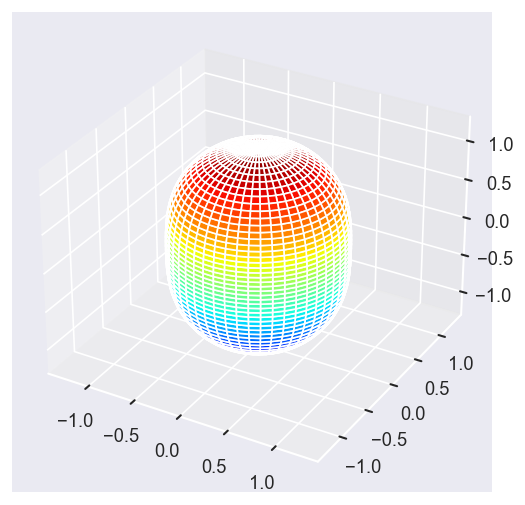

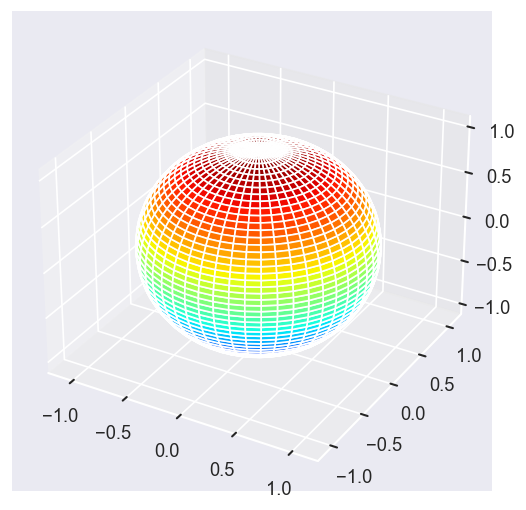

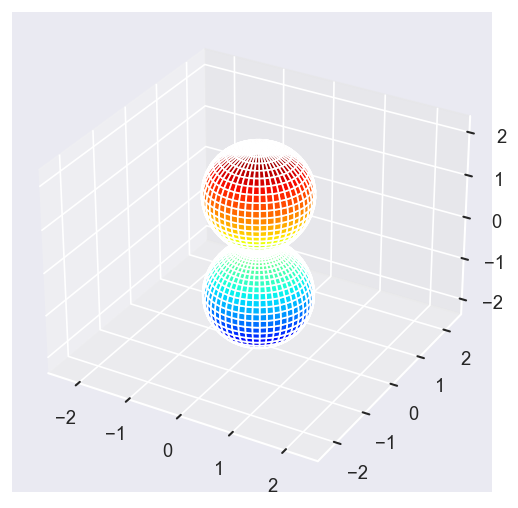

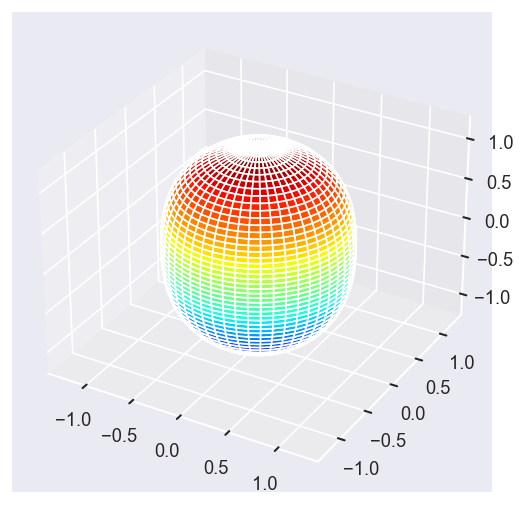

In [13]:
Eke = [1.1, 3.1, 25.1, 39.1]
# betaPlot = BetaNormX.sel(Eke=Eke)
betaPlot = BetaNormX.sel(Eke=Eke, Cont='SU', Total='SU').squeeze()

# surfs = ep.sphFromBLMPlot(betaPlot, res = 50, pType = 'r', plotFlag = True, facetDim = 'Eke', backend = 'mpl', fnType = 'lg');
surfs = ep.sphFromBLMPlot(betaPlot, res = 50, pType = 'r', plotFlag = True, facetDim = 'Eke', backend = 'mpl');

Using lg betas (as passed).
Plotting with mpl
Data dims: ('Eke', 'Theta', 'Phi'), subplots on Eke


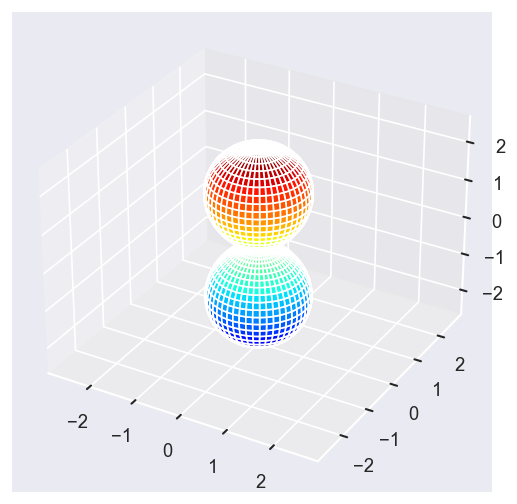

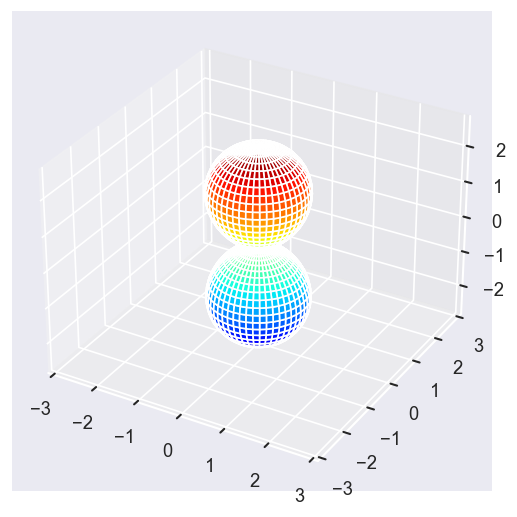

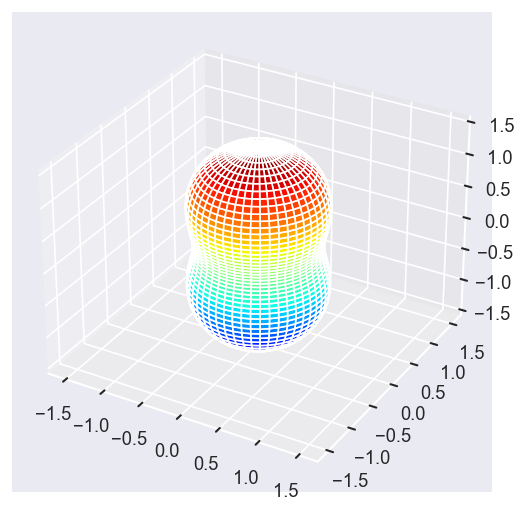

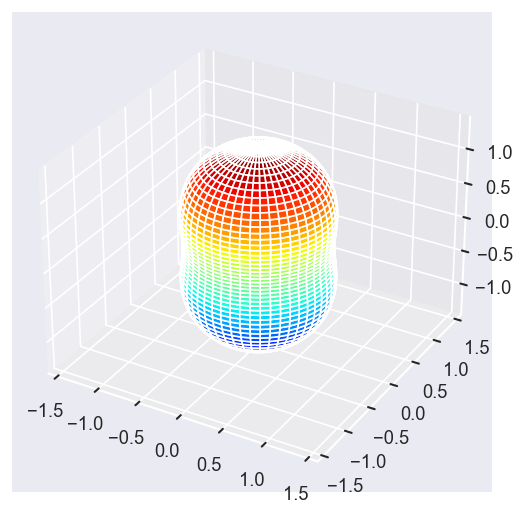

In [14]:
# Eke = [1.1, 25.1, 39.1]
# betaPlot = BetaNormX.sel(Eke=Eke)
betaPlot = BetaNormX.sel(Eke=Eke, Cont='PU', Total='PU').squeeze()
surfs = ep.sphFromBLMPlot(betaPlot, res = 50, pType = 'r', plotFlag = True, facetDim = 'Eke', backend = 'mpl', fnType = 'lg');

#### With sym summation

In [15]:
# Set parameters
SFflag = False  # Multiply matrix elements by SF?
symSum = True  # Sum over symmetries?
phaseConvention = 'S'
thres = 1e-4
selDims = {'it':1, 'Type':'L'}
thresDims = 'Eke'

# Set terms for testing - NOTE ORDERING HERE may affect CG term!!!
dlistMatE = ['lp', 'l', 'L', 'mp', 'm', 'M']  # Match published terms
dlistP = ['p1', 'p2', 'L', 'mup', 'mu', 'M']
# dlistMatE = ['l', 'lp', 'L', 'm', 'mp', 'M']  # Standard terms
# dlistP = ['p1', 'p2', 'L', 'mu', 'mup', 'M']


# Set matrix elements
matE = dataSet[0].copy()

# Calculate betas
BetaNormXS, BetaNorm, BetaRaw, XSmatE, BetaNormX = lfblmXprod(matE, symSum = symSum, SFflag = SFflag, 
                              thres = thres, thresDims = thresDims, selDims = selDims, 
                              phaseConvention = phaseConvention,
                              dlistMatE = dlistMatE, dlistP = dlistP)

# Here BetaNormXS includes the correct normalisation term as per the original formalism, and XSmatE is the sum of the squared matrix elements, as used for the normalisation (== cross section without correct scaling).
# BetaNorm is calculated only from the BLM CG formalism.

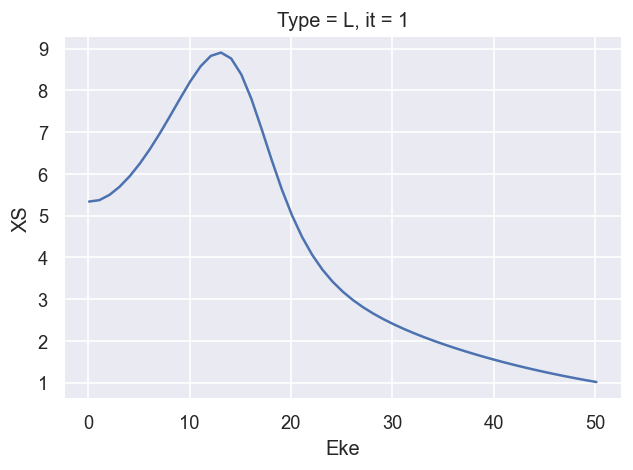

In [16]:
plotThres = None

# ep.util.matEleSelector(XSmatE, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke');
ep.util.matEleSelector(BetaNorm['XS'], thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke');

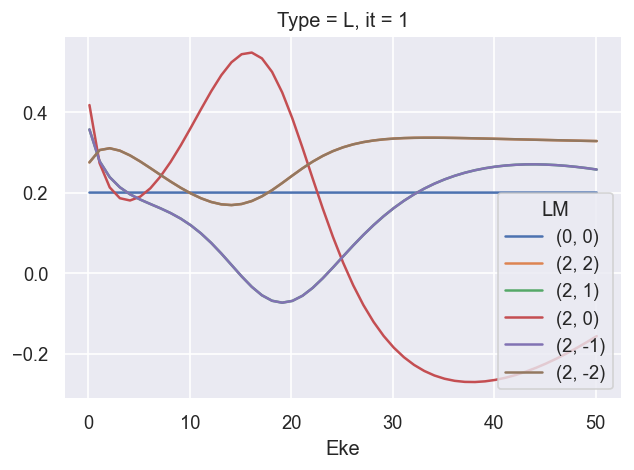

In [17]:
ep.util.matEleSelector(BetaNormXS, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke');

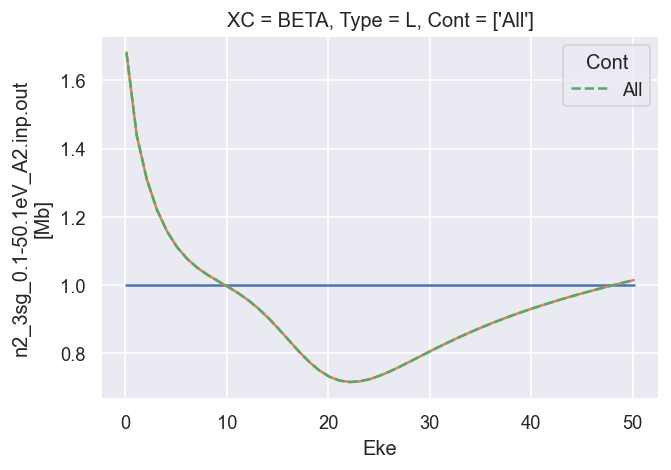

In [18]:
# Summing over M gives the final LF terms, as defined above.
# The B0 term is normalised to unity here.
# The B2 term matches the GetCro reference results.

ep.util.matEleSelector(BetaNorm.unstack('LM').sum('M'), thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke', linestyle = 'solid');  # Now fixed in source
dataXS[0].sel({'Type':'L', 'XC':'BETA', 'Total':'All'}).plot.line(x='Eke', linestyle='dashed');  # Reference results

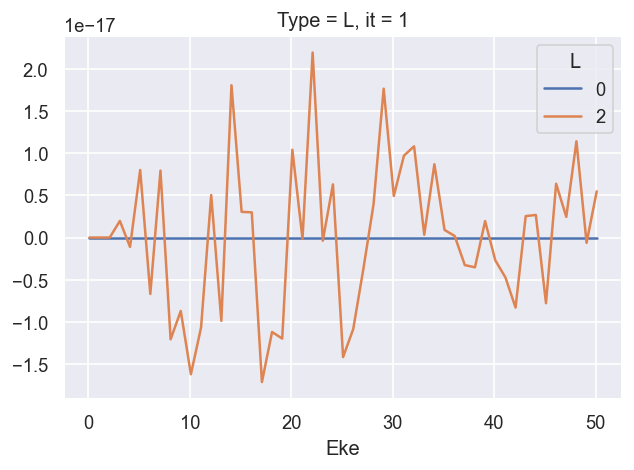

In [19]:
# Check imaginary values... should be ~0
ep.util.matEleSelector(BetaNorm.unstack('LM').sum('M'), thres = plotThres, dims='Eke', sq=True, drop=True).imag.plot.line(x='Eke', linestyle = 'solid');  # Now fixed in source

*** 26/06/20 LF CG calcs OK for $\beta_2$, still need to fix cross-section scaling.

*** 02/09/20 Fixed XS scaling.

**Compare with GetCro reference values**

In [20]:
# Compare XS values
# Comparison plot using hvplot - needs some work!
plotThres = None
xPlot1 = ep.util.matEleSelector(BetaNorm['XS'], thres = plotThres, dims='Eke', sq=True, drop=True).unstack().squeeze() #
xPlot1.name='XS calc'
plot1 = xPlot1.real.unstack().squeeze().hvplot.line(x='Eke', width=1200, height= 800);  # For hvplot need to unstack & squeeze to avoid dim issues and related errors.
# ep.util.matEleSelector(BetaNormXS_sph, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke', linestyle='dashed');

# Ugly sub-select on syms to ensure consistency over data - should be a neater way to do this!
syms = ['All']
xPlot2 = dataXS[0].sel({'Type':'L', 'XC':'SIGMA'}).unstack().sel({'Total':syms, 'Cont':syms}).squeeze();
# xPlot2 = ep.util.matEleSelector(BetaNormXS_sph, thres = plotThres, dims='Eke', sq=True, drop=True)
xPlot2.name='XS GetCro'
plot2 = xPlot2.real.unstack().squeeze().hvplot.line(x='Eke', by='Total', line_dash='dashed');

(plot1 * plot2)

:Overlay
   .Curve.I     :Curve   [Eke]   (XS calc)
   .NdOverlay.I :NdOverlay   [Total]
      :Curve   [Eke]   (XS GetCro)

*** OK - the cross-sections from the full CG-calculation and ePS `GetCro` matches.

In [21]:
# Compare B2 values
# Comparison plot using hvplot - needs some work!

xPlot1 = ep.util.matEleSelector(BetaNorm.unstack('LM').sum('M'), thres = plotThres, dims='Eke', sq=True, drop=True).sel(L=2).unstack().squeeze() #
xPlot1.name='XS calc'
plot1 = xPlot1.real.unstack().squeeze().hvplot.line(x='Eke', width=1200, height= 800);  # For hvplot need to unstack & squeeze to avoid dim issues and related errors.
# ep.util.matEleSelector(BetaNormXS_sph, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke', linestyle='dashed');

# Ugly sub-select on syms to ensure consistency over data - should be a neater way to do this!
syms = ['All']
xPlot2 = dataXS[0].sel({'Type':'L', 'XC':'BETA'}).unstack().sel({'Total':syms, 'Cont':syms}).squeeze();
# xPlot2 = ep.util.matEleSelector(BetaNormXS_sph, thres = plotThres, dims='Eke', sq=True, drop=True)
xPlot2.name='XS GetCro'
plot2 = xPlot2.real.unstack().squeeze().hvplot.line(x='Eke', by='Total', line_dash='dashed');

(plot1 * plot2)

:Overlay
   .Curve.I     :Curve   [Eke]   (XS calc)
   .NdOverlay.I :NdOverlay   [Total]
      :Curve   [Eke]   (XS GetCro)

*** OK - the $\beta_2$ from the full CG-calculation and ePS `GetCro` match for each continuum.

Plot some LFPADs...

Using lg betas (from BLMX array).
Plotting with mpl
Data dims: ('Eke', 'Theta', 'Phi'), subplots on Eke


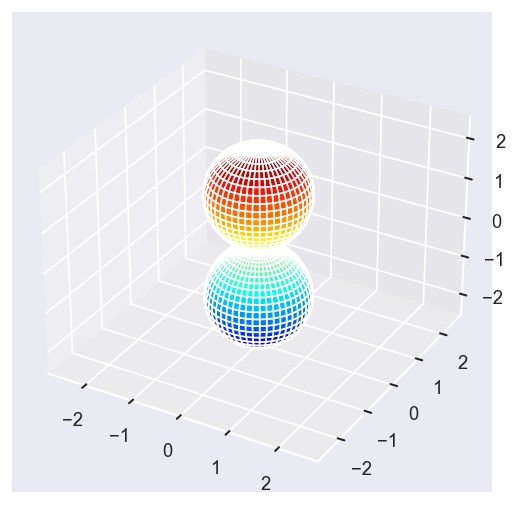

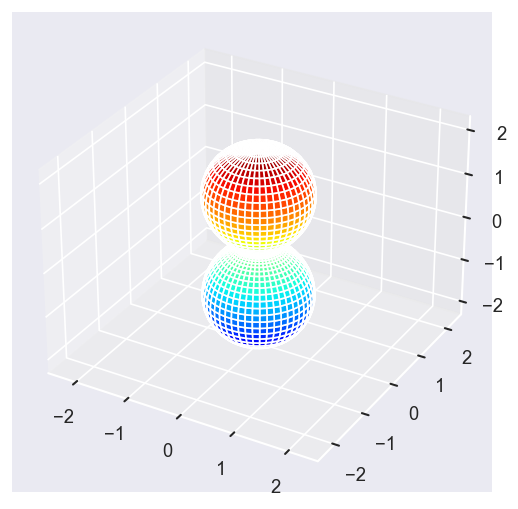

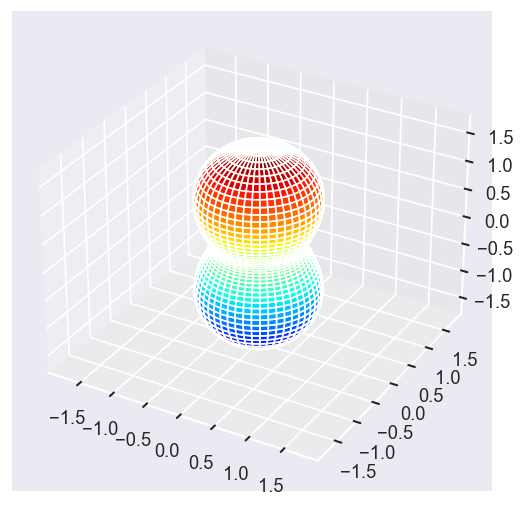

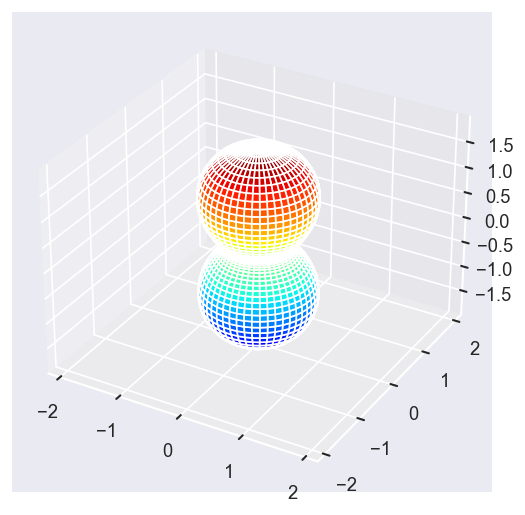

In [22]:
Eke = [1.1, 3.1, 25.1, 39.1]
betaPlot = BetaNormX.sel(Eke=Eke)
# betaPlot = BetaNormX.sel(Eke=Eke, Cont='SU', Total='SU').squeeze()
# surfs = ep.sphFromBLMPlot(betaPlot, res = 50, pType = 'r', plotFlag = True, facetDim = 'Eke', backend = 'mpl', fnType = 'lg');
surfs = ep.sphFromBLMPlot(betaPlot, res = 50, pType = 'r', plotFlag = True, facetDim = 'Eke', backend = 'mpl');

### Conversion & normalisation

This result is $\beta_2$ for a Legendre Polynomial expansion, as shown above: $\beta^{Sph}_{L,0} = \sqrt{(2L+1)/4\pi}\beta^{Lg}$. This will allow for comparison with usual AF formalism.

Test:

- Conversion to $Y_{L,M}$ form.
- LF-PADs to check numerics.
- Confirm total cross-section value & normalisation.

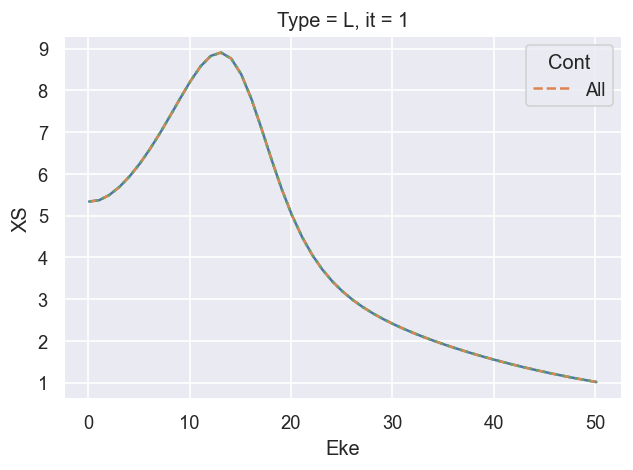

In [23]:
# Check value for XS
# BetaNormXS.unstack('LM').sum('M').sel({'L':0})

# FACTOR OF 3 - just degeneracy term in summation.  WHAT ABOUT SF...?
((XSmatE)).real.plot.line(x='Eke')

# Compare with reference results
(dataXS[0].sel({'Type':'L', 'XC':'SIGMA', 'Sym':'All'})).plot.line(x='Eke', linestyle='dashed');

# OK

# Try also vs. vanilla calc...
ep.util.matEleSelector(BetaNorm['XS'], thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke', linestyle='dotted');
# OK

In [24]:
# BetaNorm_sph = ep.conversion.conv_BL_BLM(BetaNorm.unstack('LM').sum('M'), to='sph')
BetaNormX_sph = ep.conversion.conv_BL_BLM(BetaNormX, to='sph', renorm=True)

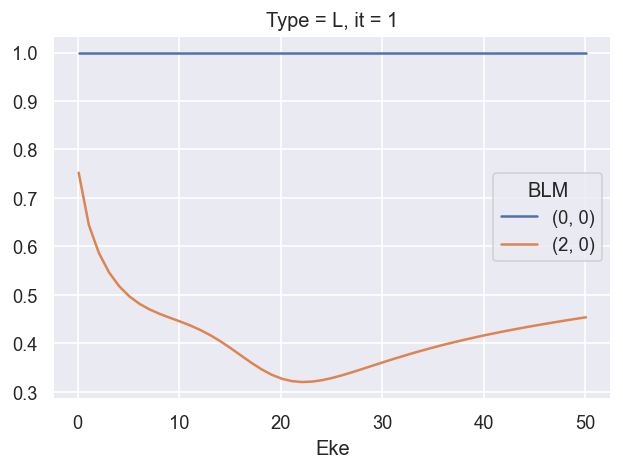

In [25]:
# Check conversion to Sph normalised betas
# ep.util.matEleSelector(BetaNormXS_sph, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke');
# ep.util.matEleSelector(BetaNorm_sph, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke');
ep.util.matEleSelector(BetaNormX_sph, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke');

Q: is $\beta_{0,0} = \sqrt{1/4\pi}$ value meaningful here, or an issue?  Should renorm or otherwise set this to 1? XS should be conserved... is this indicative of another missing/assumed normalisation term? Sph normalisation choice? YES - matches definition for orthonormal sph, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sph_harm.html and https://shtools.github.io/SHTOOLS/complex-spherical-harmonics.html#supported-normalizations.

NOTE - in previous cases this has been normalised away, but significant in cases where XS is preserved.

UPDATE - this is now fixed in `ep.conversion.conv_BL_BLM`. Default will output values for which full expansions matche (i.e. Pl==Yl expansion), which results in $\beta^{sph}_{0,0}=\sqrt(4\pi)$ for $\beta^{lg}_{0}=1$. If `renorm=True` is set (default case), then values are renormalised to $\beta_{0}=1$.

## Test vs. AF code

Should be identical for unaligned case.

06/07/20 - quick testing, things are CLOSE to reference results above, but there still seems to be inconsistencies somewhere, possibly in renorm only?

01/09/20 - now looking OK for LF (isotropic) case, although renorm per $L$ may still be off.

09/09/20 - now working correctly, including SF.

In [26]:
phaseConvention = 'E'  # Set phase conventions used in the numerics - for ePolyScat matrix elements, set to 'E', to match defns. above.

symSum = True  # Sum over symmetry groups, or keep separate?
SFflag = False  # Include scaling factor to Mb in calculation?

SFflagRenorm = False  # Renorm terms
BLMRenorm = 1

thres = 1e-6
RX = ep.setPolGeoms()  # Set default pol geoms (z,x,y), or will be set by mfblmXprod() defaults - FOR AF case this is only used to set 'z' geom for unity wigner D's - should rationalise this!

selDims = {'it':1, 'Type':'L'}
thresDims = 'Eke'

start = time.time()
mTermST, mTermS, mTermTest, BetaNormX = ep.geomFunc.afblmXprod(dataSet[0], QNs = None, RX=RX, thres = thres, selDims = selDims, thresDims=thresDims, 
                                                    symSum=symSum, SFflag=SFflag, phaseConvention=phaseConvention, BLMRenorm=BLMRenorm)
end = time.time()
print('Elapsed time = {0} seconds, for {1} energy points, {2} polarizations, threshold={3}.'.format((end-start), mTermST.Eke.size, RX.size, thres))

# Elapsed time = 3.3885273933410645 seconds, for 51 energy points, 3 polarizations, threshold=0.01.
# Elapsed time = 5.059587478637695 seconds, for 51 energy points, 3 polarizations, threshold=0.0001.

Elapsed time = 3.8837740421295166 seconds, for 51 energy points, 3 polarizations, threshold=1e-06.


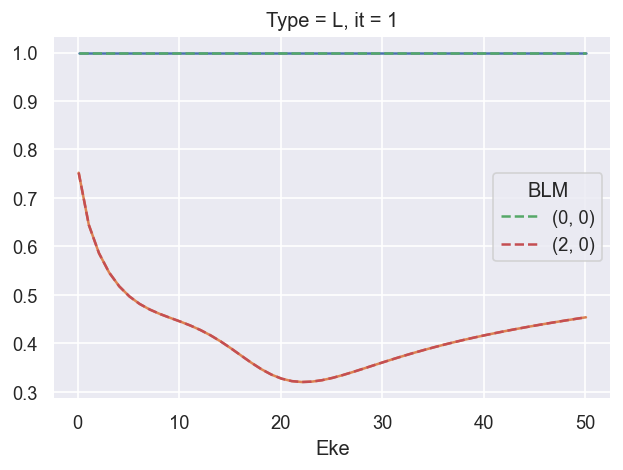

In [27]:
# 09/09/20 - updating here for BetaNormX values...

ep.util.matEleSelector(BetaNormX, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke');  # Values from AF code
ep.util.matEleSelector(BetaNormX_sph, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke', linestyle='dashed');  # Values from LF code.

###### B2 OK!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# BLMRenorm = 1 OK (renorm by XS only, SFflag True or False OK)
# BLMRenorm = 2 FAIL
# BLMRenorm = 3 FAIL (B00 = 2, B20 renorm off by ~2. something)
# BLMRenorm = 4 FAIL (B00 = 2, B20 renorm off by ~2. something)




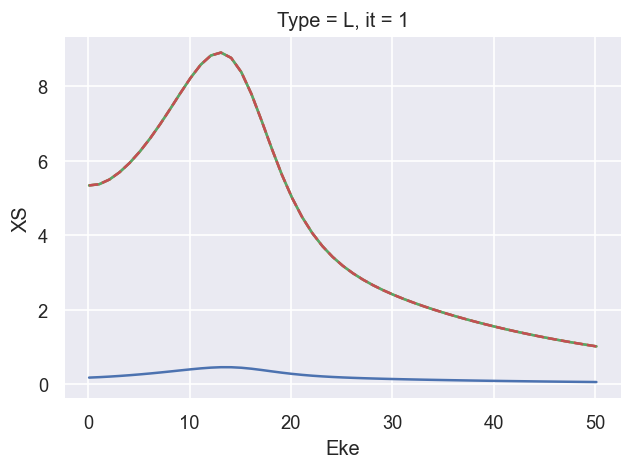

In [33]:
# 09/09/20 - updating here for BetaNormX values...

ep.util.matEleSelector(BetaNormX['XSraw'], thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke');  # Values from AF code - note these are small, with complex terms
ep.util.matEleSelector(BetaNormX['XSrescaled'], thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke');  # Values from AF code - real valued
ep.util.matEleSelector(BetaNormX['XSiso'], thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke');  # Values from sum over matrix elements

# Ref. values from LF code
ep.util.matEleSelector(BetaNormX_sph['XS'], thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke', linestyle='dashed');  # Values from LF code.

###### XS OK!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Now set with:
#  - XSraw = direct AF calculation output.
#  - XSrescaled = XSraw * SF * sqrt(4pi)
#  - XSiso = direct sum over matrix elements


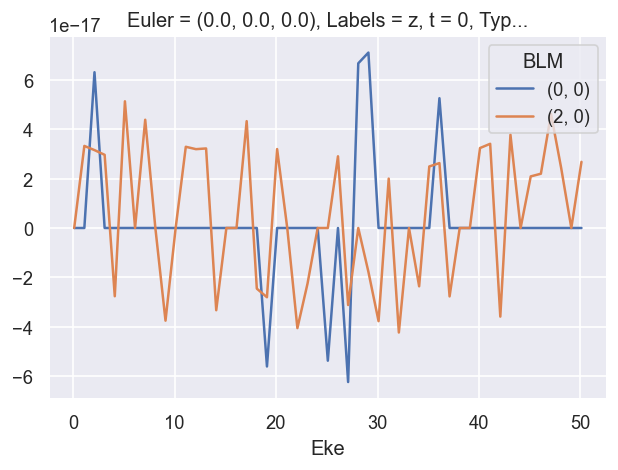

In [34]:
# Check imaginary values... should be ~0
ep.util.matEleSelector(BetaNormX, thres = plotThres, dims='Eke', sq=True, drop=True).imag.plot.line(x='Eke', linestyle = 'solid');
# OK

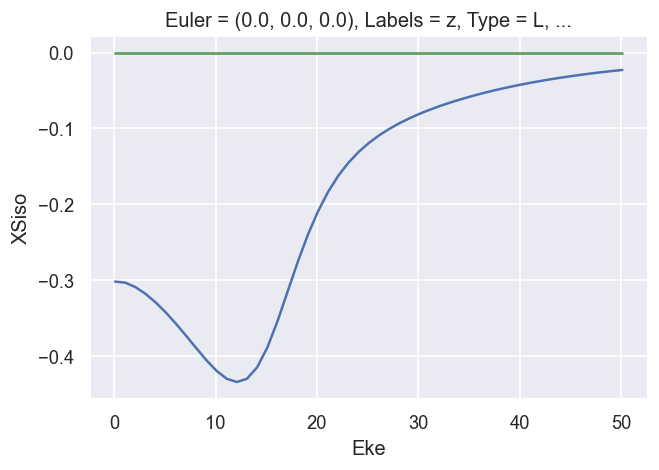

In [37]:
# Check imaginary values for XS terms... should be ~0
ep.util.matEleSelector(BetaNormX['XSraw'], thres = plotThres, dims='Eke', sq=True, drop=True).imag.plot.line(x='Eke', linestyle = 'solid');
ep.util.matEleSelector(BetaNormX['XSrescaled'], thres = plotThres, dims='Eke', sq=True, drop=True).imag.plot.line(x='Eke', linestyle = 'solid');
ep.util.matEleSelector(BetaNormX['XSiso'], thres = plotThres, dims='Eke', sq=True, drop=True).imag.plot.line(x='Eke', linestyle = 'solid');

# OK except for XSraw, which has non-zero imag terms.

## Version info

In [40]:
import scooby
scooby.Report(additional=['epsproc', 'xarray', 'holoviews'])

--------------------------------------------------------------------------------
  Date: Thu Sep 10 12:12:27 2020 Eastern Daylight Time

                OS : Windows
            CPU(s) : 32
           Machine : AMD64
      Architecture : 64bit
               RAM : 63.9 GB
       Environment : Jupyter

  Python 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]

           epsproc : 1.2.5-dev
            xarray : 0.15.0
         holoviews : 1.13.3
             numpy : 1.19.1
             scipy : 1.3.0
           IPython : 7.12.0
        matplotlib : 3.3.1
            scooby : 0.5.6

  Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191125 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------